In [7]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [8]:
import scipy.stats as stats;
from sklearn.model_selection import train_test_split;
from sklearn.model_selection import cross_val_score;
from sklearn.linear_model import LogisticRegression;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.metrics import accuracy_score;
from sklearn.preprocessing import FunctionTransformer;
from sklearn.compose import ColumnTransformer;

In [9]:
df = pd.read_csv('train.csv' , usecols=['Age' , 'Fare' , 'Survived'])

In [12]:
df['Age'].fillna(df['Age'].mean() , inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [15]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [16]:
X = df.iloc[: , 1:3];
y = df.iloc[: , 0];

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2 , random_state=42);

<h1 style="color:orange; padding:14px">Analysing data</h1>

C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_3840\1771524542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age']); plt.title("Age PDF");


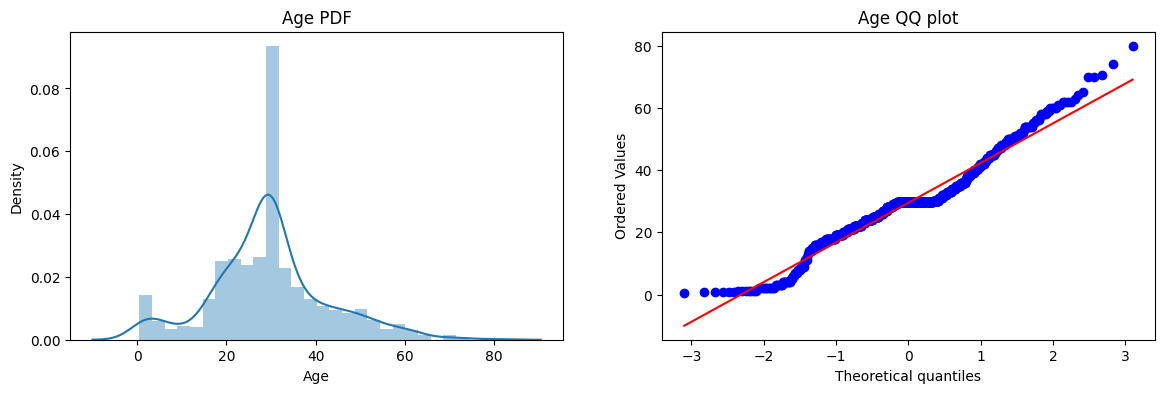

In [27]:
plt.figure(figsize=(14,4));
plt.subplot(121)
sns.distplot(X_train['Age']); plt.title("Age PDF");

plt.subplot(122)
stats.probplot(X_train['Age'] , dist="norm" , plot=plt);
plt.title("Age QQ plot"); plt.show()

C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_3840\3243833326.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare']); plt.title("Fare PDF");


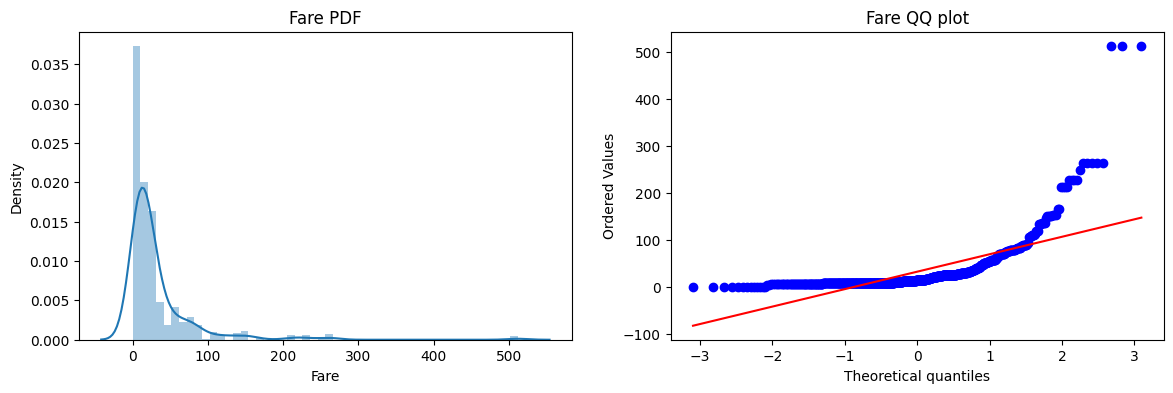

In [26]:
plt.figure(figsize=(14,4));
plt.subplot(121)
sns.distplot(X_train['Fare']); plt.title("Fare PDF");

plt.subplot(122)
stats.probplot(X_train['Fare'] , dist="norm" , plot=plt);
plt.title("Fare QQ plot"); plt.show()

<h1 style="color:orange; padding:14px">Predicting without transforms</h1>

In [28]:
clf= LogisticRegression();
clf2 = DecisionTreeClassifier();

In [30]:
clf.fit(X_train , y_train);
clf2.fit(X_train , y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
y_pred = clf.predict(X_test);
y_pred2 = clf2.predict(X_test)

print("Accuracy score of lr: " , accuracy_score(y_test , y_pred));
print("Accuracy score of dt: " , accuracy_score(y_test , y_pred2));

Accuracy score of lr:  0.6480446927374302
Accuracy score of dt:  0.6536312849162011


<h1 style="color:orange; padding:14px">Applying transforms</h1>

In [33]:
trf = FunctionTransformer(func=np.log1p)

In [38]:
X_train_transformed = trf.fit_transform(X_train);
X_test_transformed = trf.transform(X_test);

C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_3840\1811196625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Age']); plt.title("Age PDF");


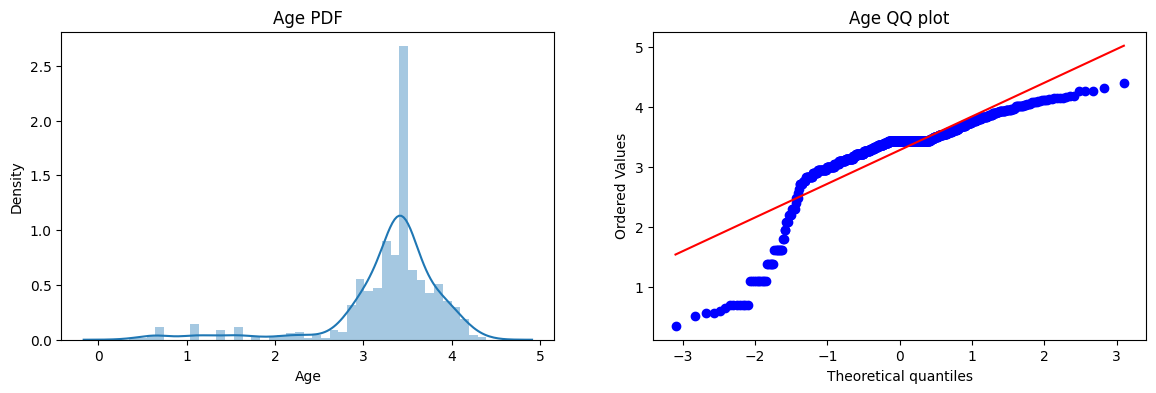

In [39]:
plt.figure(figsize=(14,4));
plt.subplot(121)
sns.distplot(X_train_transformed['Age']); plt.title("Age PDF");

plt.subplot(122)
stats.probplot(X_train_transformed['Age'] , dist="norm" , plot=plt);
plt.title("Age QQ plot"); plt.show()

C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_3840\554208728.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['Fare']); plt.title("Fare PDF");


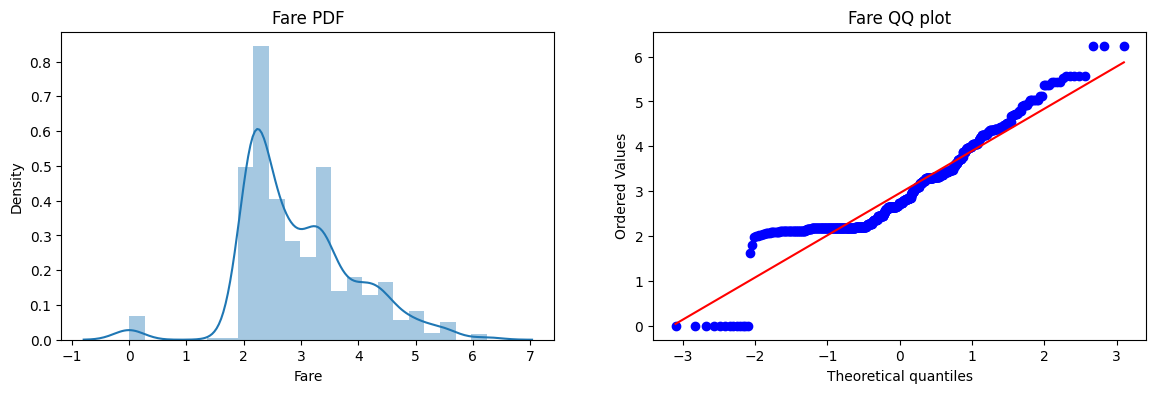

In [40]:
plt.figure(figsize=(14,4));
plt.subplot(121)
sns.distplot(X_train_transformed['Fare']); plt.title("Fare PDF");

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'] , dist="norm" , plot=plt);
plt.title("Fare QQ plot"); plt.show()

In [41]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6871508379888268


In [43]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.664481897627965


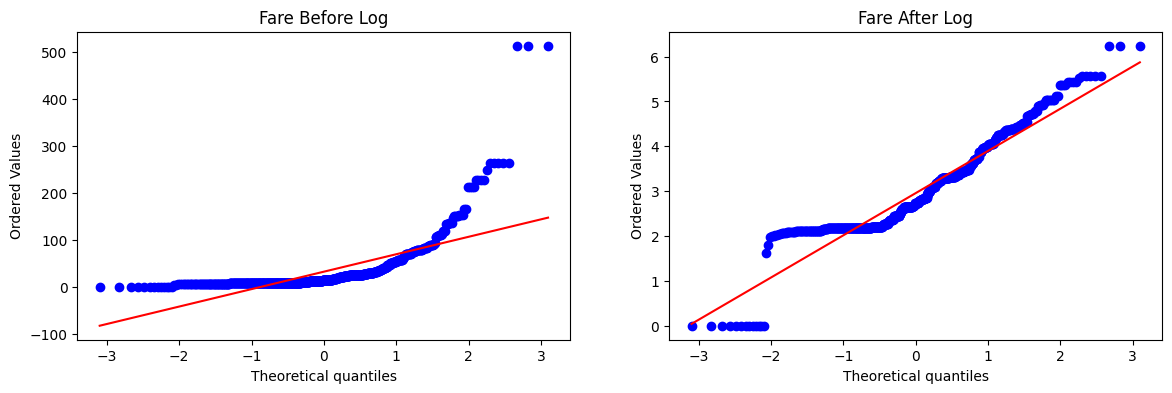

In [44]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

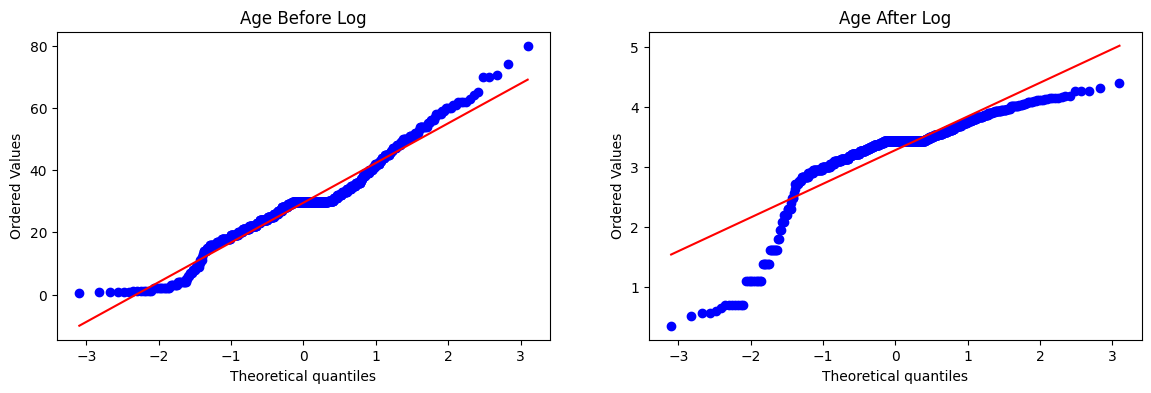

In [45]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

<h1 style="color:orange; padding:14px">applying log only on fare</h1>

In [46]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [47]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [48]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6633208489388264


In [49]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6712609238451936


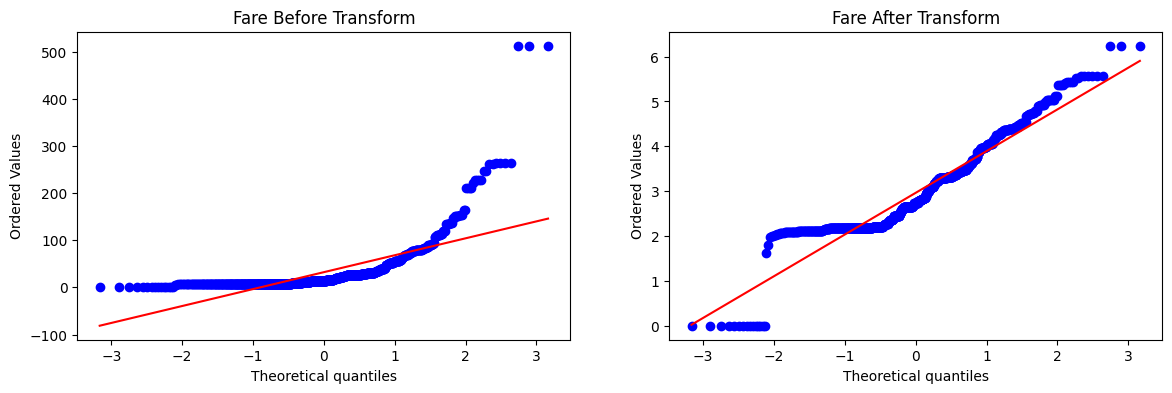

In [52]:
apply_transform(np.log1p)